## Introduction

This notebook contains an exploratory data analysis of the "Automobile" dataset. The dataset contains information about different types of automobiles, including their attributes such as make, price, body style, horsepower, and fuel efficiency.


## Preparing The Data

In [56]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
#### load the automobile dataset and create their dataframes

df = pd.read_csv('automobile.txt')

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

Missing data has the ? sign

In [58]:
# let's change it to NAN
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Checking for nan values

In [59]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Now we have an idea on what columns are missing data

Let's replace nan values

In [60]:
# Get the mean value of the column
df['normalized-losses'].astype('float64').mean()

122.0

In [61]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [62]:
df['horsepower'].astype('float64').mean()

104.25615763546799

In [63]:
df['bore'].astype('float64').mean()

3.3297512437810957

In [64]:
df['peak-rpm'].astype('float64').mean()

5125.369458128079

In [65]:
df['stroke'].astype('float64').mean()

3.2554228855721337

In [66]:
# Replace nan values
df['normalized-losses'].replace(np.nan,122,inplace=True)

df['num-of-doors'].replace(np.nan,'four',inplace=True)

df['horsepower'].replace(np.nan,104.22,inplace=True)

df['bore'].replace(np.nan,3.33,inplace=True)

df['peak-rpm'].replace(np.nan,5125.99,inplace=True)

df['stroke'].replace(np.nan,3.26,inplace=True)

In [67]:
#drop the rows the does not have prices
df.dropna(subset=["price"], axis=0, inplace=True)

#reset the index because we droped 4 rows
df.reset_index(drop=True, inplace=True)

In [68]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [69]:
# Check data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [70]:
# Correct the data formats
df[['normalized-losses','horsepower','peak-rpm','price']] = df[['normalized-losses','horsepower','peak-rpm','price']].astype('int64')
df[['bore','stroke']] = df[['bore','stroke']].astype('float64')

## Data Analysis

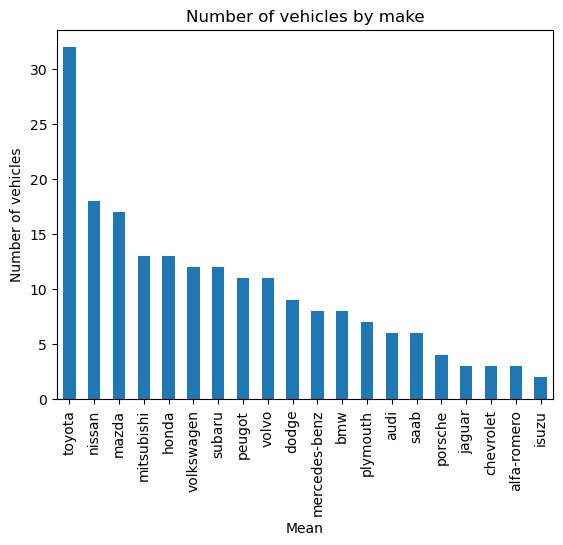

In [78]:
# Plot the number of vehicles by make
df.make.value_counts().nlargest(20).plot(kind='bar') # Only taken 20 cars
figsize=(20,10)
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Mean');

From the above graph we can see that Toyota has the most cars with 35%, second one is Nissan with 18%.

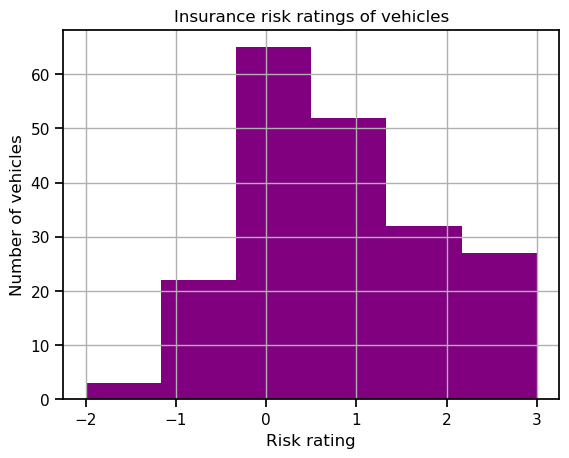

In [112]:
# Plot the insurance risk ratings
df.symboling.hist(bins=6,color='purple');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

There are more cars in the range of 0 and 1.

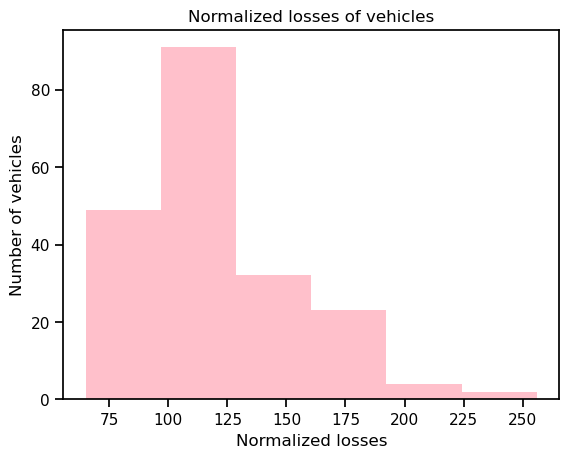

In [114]:
# Plot normalized losses
df['normalized-losses'].hist(bins=6,color='pink', grid=False) # false removes the grid lines
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

The number of cars with normalized losses (the average loss payment per insured vehicle) is highest in the range between 65 and 210.

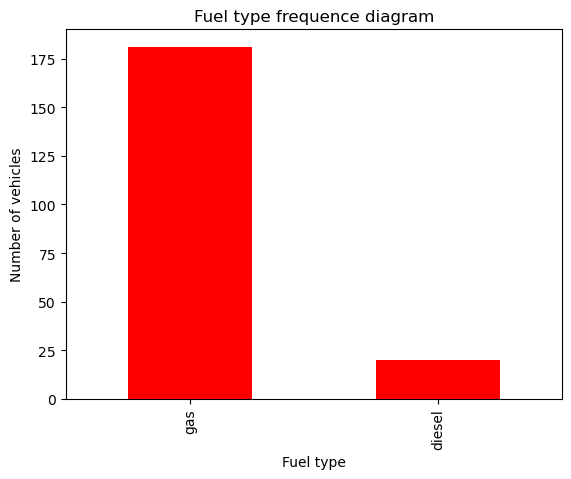

In [87]:
# Plot the Fuel type frequency
df['fuel-type'].value_counts().plot(kind='bar', color='red')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

There are more gas-powered vehicles than diesel-powered vehicles.

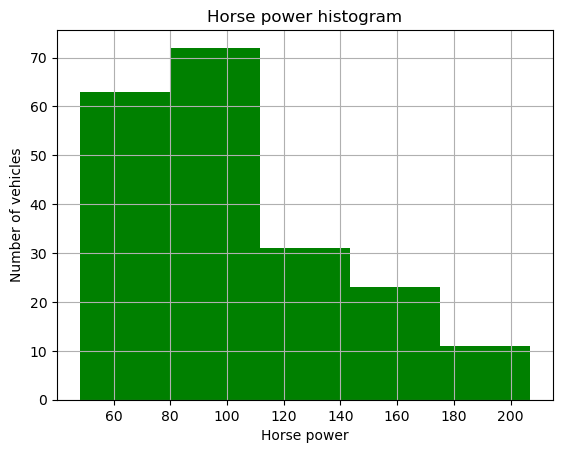

In [88]:
# Plot the horse power
df.horsepower[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())].hist(bins=5, color='green');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

We are calculating the standard deviation of horsepower because there are some outliers present in the data.

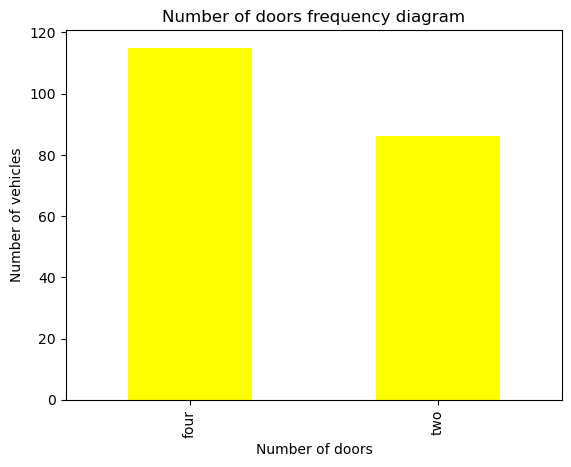

In [89]:
# Plot the number of doors
df['num-of-doors'].value_counts().plot(kind='bar', color='yellow')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

The above graph shows that four-door cars are more popular.

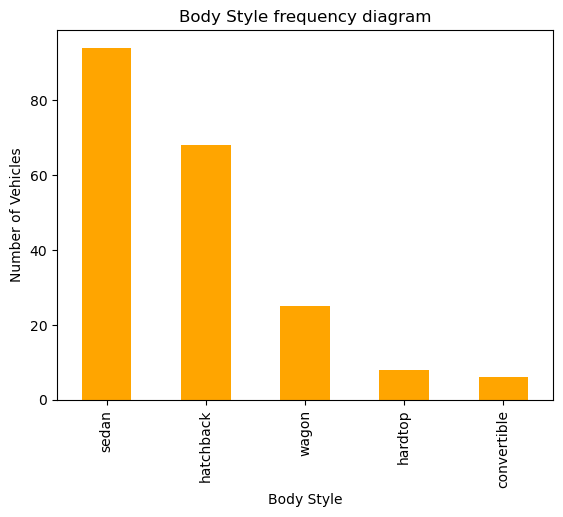

In [90]:
# Plot the body style
df['body-style'].value_counts().plot(kind='bar', color='orange')
plt.title("Body Style frequency diagram")
plt.ylabel('Number of Vehicles')
plt.xlabel('Body Style');

Sedans and hatchbacks make up over 60% of the body style feature.

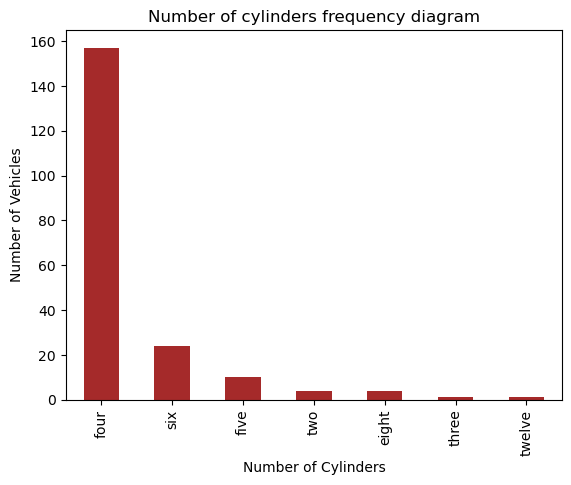

In [91]:
# Plot the number of cilynders
df['num-of-cylinders'].value_counts().plot(kind='bar',color='brown')
plt.title("Number of cylinders frequency diagram")
plt.ylabel('Number of Vehicles')
plt.xlabel('Number of Cylinders');

Four Cylinder cars are the most popular.

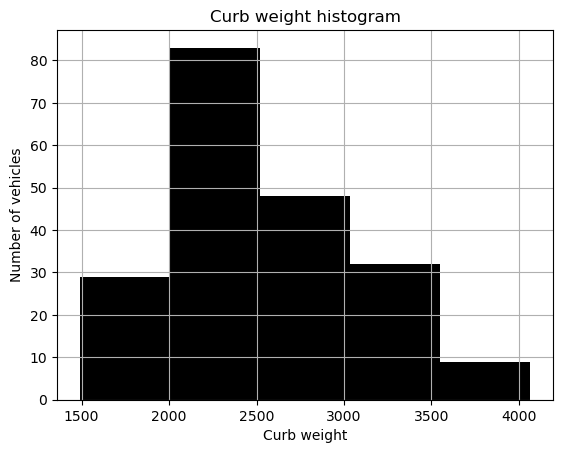

In [92]:
# Plot the curb weight
df['curb-weight'].hist(bins=5,color='black');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

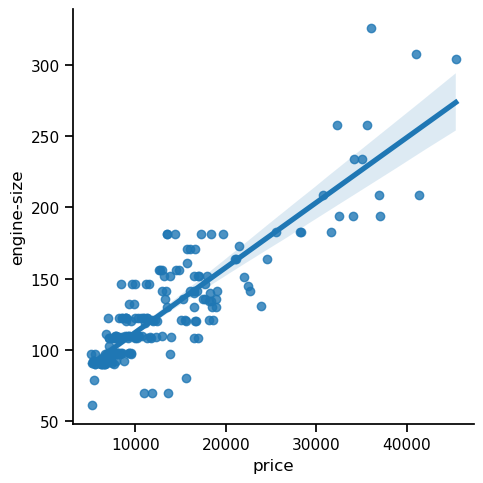

In [110]:
# Scatter plot the price and engine size
g = sns.lmplot(data=df, x='price', y='engine-size')

The price of a car tends to increase with the size of its engine.

## Correlation Analysis

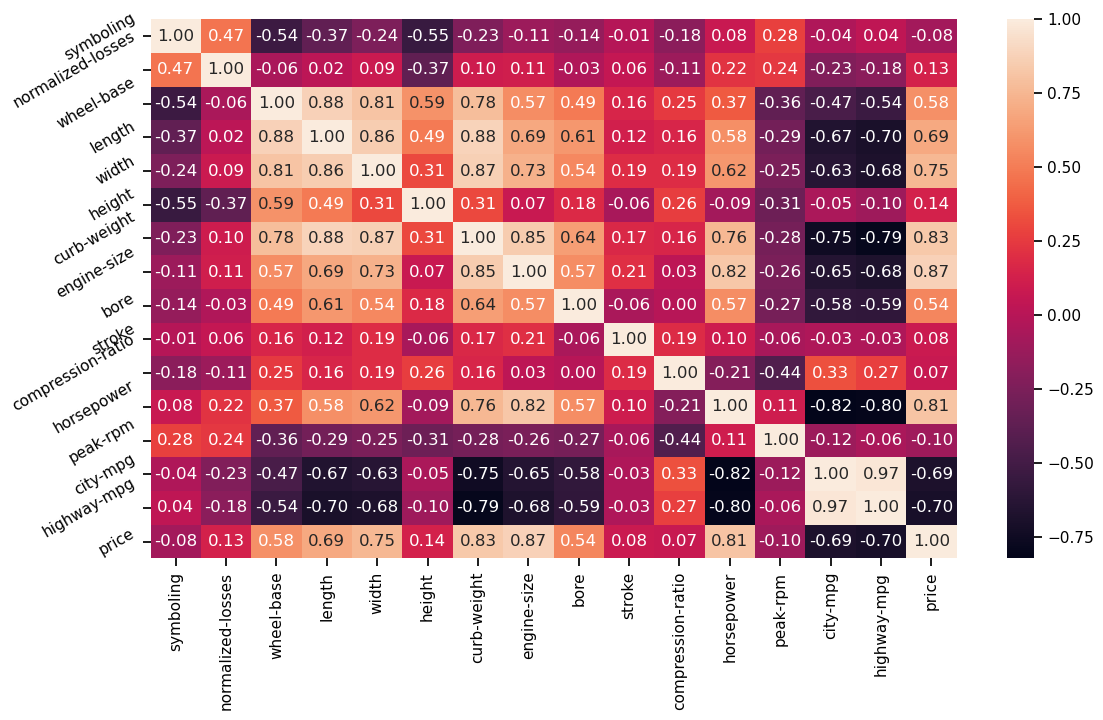

In [93]:
# Plot the correlation heatmap
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

The price of a car is more closely related to its engine size and curb weight. 
The curb weight, which is the weight of the car with all of its standard equipment, is typically correlated with the engine size, length, width, and wheelbase of the car. 
The wheelbase, which is the distance between the front and rear wheels, is strongly correlated with the length and width of the car. 
The normalized losses, which are a measure of the severity of insurance claims, are more correlated with the symboling, which is a rating of the risk associated with a car, than the other fields.

## Conclusion

For this analysis, we selected several key features of the automobile dataset and found the following results:

- Toyota is the make of the car which has most number of vehicles with more than 35% than the 2nd highest is Nissan.

- Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

- Most preferred fuel type for the customer is gas with than 80% of the choice.

- Four door and four cylinder cars are the most popular.

- Sedans and hatchbacks make up over 60% of the body style feature.

- Curb weight of the cars are distributed between 1500 and 4000.

- The price of a car tends to increase with the size of its engine.
